In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [2]:
def myscore(model, X, ncluster) :
    c_coef = silhouette_samples(X, ncluster)
    print(c_coef[:5])
    df["c_coef"] = c_coef

    score = silhouette_score(X, ncluster)
    print(score)
    
    print(f"응집도 : {model.inertia_:.4f}")

In [3]:
df = pd.read_csv('data7.csv', encoding='cp949')
df.head()

,gender,age,job,family_size,child_num,income,knowledge,exp,risk,term,s1,s2,s3,s4,s5
0,0,1,4,0,0,0,1,3,2,2,1.445225,2.008694,1.486878,1.937945,1.291326
1,1,0,4,3,0,5,2,2,1,3,2.613167,1.570438,0.880678,2.951382,1.611008
2,0,2,6,1,1,0,0,1,1,2,2.327145,0.960382,1.453057,1.990348,1.222475
3,1,4,4,0,0,1,2,2,0,1,2.715708,1.635769,0.465651,1.214520,0.946474
4,1,3,2,0,1,1,0,2,0,2,3.241083,1.185077,1.849169,1.965570,0.111041


In [4]:
df.shape

(50000, 15)

In [5]:
df.describe()

,gender,age,job,family_size,child_num,income,knowledge,exp,risk,term,s1,s2,s3,s4,s5
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.484140,2.138960,3.822940,0.925580,0.966120,1.89934,0.916120,1.677940,0.762020,1.720160,2.648400,1.538461,1.404971,2.272573,1.409629
std,0.499753,1.423464,2.121028,0.941498,0.930564,1.66638,1.119959,1.002456,0.800674,0.985327,0.820644,0.617435,0.803112,0.967217,0.587872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.240411,-0.999444,-1.824703,-1.523431,-0.882604
25%,0.000000,1.000000,2.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,2.093303,1.121349,0.869231,1.618616,1.014152
50%,0.000000,2.000000,4.000000,1.000000,1.000000,1.00000,0.000000,2.000000,1.000000,2.000000,2.651344,1.537905,1.408436,2.275092,1.408430
75%,1.000000,3.000000,5.000000,2.000000,2.000000,3.00000,2.000000,2.000000,1.000000,2.000000,3.198625,1.954673,1.948418,2.927481,1.808010
max,1.000000,4.000000,10.000000,3.000000,3.000000,5.00000,3.000000,3.000000,3.000000,3.000000,6.417335,4.493922,4.821745,6.232453,3.985831


In [6]:
df = df[["gender", "age", "income"]]
# cate_df2 = df[["gender", "age", "income", "score"]]
# cate_df3 = df[["gender", "age", "income", "knowledge"]]
# cate_df4 = df[["gender", "age", "income", "experience"]]
# cate_df5 = df[["gender", "age", "income", "risk"]]
# cate_df6 = df[["gender", "age", "income", "knowledge", "experience"]]
# cate_df7 = df[["gender", "age", "income", "knowledge", "risk"]]

In [7]:

dic = {0:4,1:3,2:2,3:1,4:0}
df["age"] = df["age"].map(dic)
# df["score"] =  df[["gender","age","knowledge","exp","risk"]].sum(axis=1)

In [8]:
# df.drop(df.loc[df['family_size'] <= df['child_num']].index,inplace=True)

In [9]:
df.shape

(50000, 3)

# Clustering Analysis

- 2가지 피쳐 대상으로 군집화 수행 후 시각화

In [11]:
from sklearn.cluster import KMeans

# # x = df.iloc[:, [1, 6]].values
# inertia = []

# for n in range(1, 11):
#     km = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=0))
#     km.fit(x)
#     inertia.append(km.inertia_)

In [13]:
# xlabel = 'a'
# ylabel = 'b'

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# y_means = km.fit_predict(x)

# plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'yellow', label = '1')
# plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = '2')
# plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = '3')
# plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'orange', label = '4')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'pink', label = '5')
# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

# plt.style.use('fivethirtyeight')
# plt.title('K Means Clustering', fontsize = 20)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.legend()
# plt.grid()
# plt.show()

In [14]:
X = df.values

y_means = km.fit(X)

df['cluster'] = km.labels_

- 모든 피처 대상으로 군집화 수행
- labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 df에 'cluster' 컬럼으로 추가
- 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA 값으로 각 데이터 차원 축소

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:, 1]

df.head()

,gender,age,income,cluster,pca_x,pca_y
0,0,3,0,1,-1.908698,1.124930
1,1,4,5,2,3.083574,2.162469
2,0,2,0,1,-1.900638,0.124967
3,1,0,1,3,-0.884055,-1.869632
4,1,1,1,3,-0.892115,-0.869668


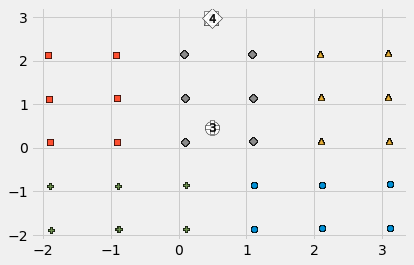

In [16]:
cluster_labels = km.fit_predict(X)
df['kmeans_label'] = cluster_labels
centers = km.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for label in unique_labels:
  label_cluster = df[df['kmeans_label'] == label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], edgecolors='k', marker=markers[label] )

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolors='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolors='k', marker='$%d$' % label)

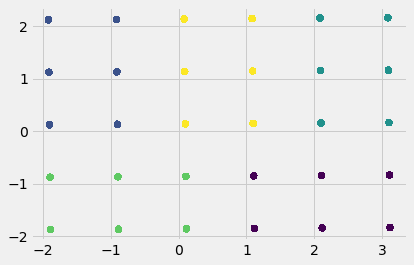

In [17]:
plt.scatter(x=df.loc[:, 'pca_x'], y=df.loc[:, 'pca_y'], c=df['cluster'])